In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Grab finished Dataframe, drop columns for season and season week (this will be looking at whole time period)
death_df = pd.read_csv("../Data/final_death_data.csv").drop(["season", "season_week"], axis=1)
death_df

,jurisdiction,week_end_date,all_cause,septicemia,cancer,diabetes,Alzheimers,influenza_pneumonia,chronic_LRD,other_respiratory,kidney,NEC,heart_disease,CBVD,COVID19_UCOD
0,United States,10/11/2014,47893.412605,668.994550,11253.333593,1342.112333,1747.219973,797.845580,2462.600894,624.669796,859.694075,633.947070,11132.729029,2398.690782,0.0
1,United States,10/18/2014,47834.656536,713.319304,11094.589124,1294.695154,1810.099275,847.324376,2481.155442,644.255152,800.938005,615.392521,11358.476034,2520.326155,0.0
2,United States,10/25/2014,47588.293365,648.378385,11136.852262,1301.910811,1852.362413,828.769828,2515.172114,658.686468,818.461745,612.300097,11098.712357,2544.034745,0.0
3,United States,11/1/2014,47476.966075,706.103647,11115.205289,1262.740098,1870.916962,855.570842,2529.603429,620.546563,835.985485,566.944534,10925.536572,2506.925648,0.0
4,United States,11/8/2014,49511.781548,693.733948,11181.177016,1369.944155,1972.966978,814.338512,2698.655981,673.117783,820.523362,684.456674,11642.979109,2654.331227,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,United States,8/29/2020,57355.000000,697.000000,10936.000000,1709.000000,2268.000000,627.000000,2417.000000,703.000000,923.000000,1408.000000,11613.000000,2799.000000,4892.0
308,United States,9/5/2020,56292.000000,653.000000,10709.000000,1648.000000,2331.000000,679.000000,2394.000000,756.000000,863.000000,1498.000000,11573.000000,2663.000000,4152.0
309,United States,9/12/2020,55724.000000,641.000000,10764.000000,1713.000000,2188.000000,655.000000,2399.000000,708.000000,880.000000,1715.000000,11369.000000,2872.000000,3784.0
310,United States,9/19/2020,55627.000000,706.000000,10918.000000,1660.000000,2222.000000,659.000000,2358.000000,762.000000,849.000000,1757.000000,11674.000000,2770.000000,3450.0


In [2]:
# Array holding causes of death is crafted
causes_array = death_df.columns[2:]
causes_array

Index(['all_cause', 'septicemia', 'cancer', 'diabetes', 'Alzheimers',
       'influenza_pneumonia', 'chronic_LRD', 'other_respiratory', 'kidney',
       'NEC', 'heart_disease', 'CBVD', 'COVID19_UCOD'],
      dtype='object')

In [3]:
# Array of Titles is crafted with indexing identical to array of causes of death 
title_array = ["All-Causes", "Septicemia", "Cancer", "Diabetes", "Alzheimer Disease", "Influenza-Pneumonia",\
              "Chronic Lower Respiratory Disease", "Other Respiratory Illness", "Kidney Disease", "NEC",\
              "Heart Disease", "Cerebrovascular Disease", "Covid 19"]
title_array

['All-Causes',
 'Septicemia',
 'Cancer',
 'Diabetes',
 'Alzheimer Disease',
 'Influenza-Pneumonia',
 'Chronic Lower Respiratory Disease',
 'Other Respiratory Illness',
 'Kidney Disease',
 'NEC',
 'Heart Disease',
 'Cerebrovascular Disease',
 'Covid 19']

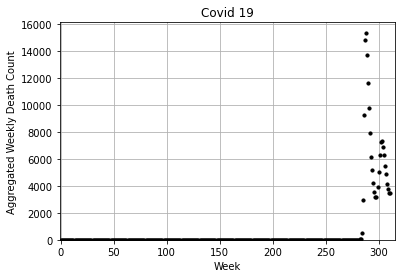

In [4]:
# Create scatterplots for all causes of death

# For loop to generate visualizations for all causes of death
for i in range(len(causes_array)):
    
    # Cause of death and relevant title grabbed
    cause = causes_array[i]
    title = title_array[i]
    
    # Clear plot from last run
    plt.clf()
    
    # points are created
    x = death_df.index
    y = death_df[cause]
    
    # Points are plotted, and labels made
    plt.scatter(x, y, facecolor="black", s=10, zorder=2)
    plt.title(title)
    plt.xlabel(f'Week')
    plt.ylabel("Aggregated Weekly Death Count")
    plt.grid(True, zorder=1)
    plt.ylim([0, max(death_df[cause])*1.05])
    plt.xlim([-1,315])
    
    # plot is saved as a png with identifying title
    plt.savefig(f'../Visualizations/aggregated__cause_of_death_{cause}.png',format='png')